In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../ReplaceVal/0134.csv', index_col = 0)

In [10]:
df.chrt.unique()

array([1922, 1942, 1958, 1951, 1947, 1949, 1953, 1935, 1944, 1945, 1946,
       1957, 1939, 1952, 1931, 1925, 1941, 1920, 1937, 1956, 1933, 1940,
       1948, 1950, 1954, 1938, 1943, 1934, 1916, 1955, 1930, 1917, 1914,
       1921, 1926, 1928, 1929, 1932, 1918, 1936, 1924, 1927, 1919, 1923,
       1915])

In [11]:
# Prepare cohort size to plot shares

In [12]:
chrt_sz_dict = df.chrt.value_counts().to_dict()

In [13]:
df['chrt_sz'] = df.chrt.map(chrt_sz_dict)

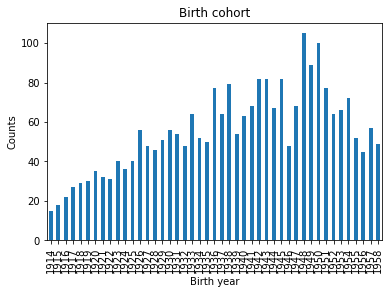

In [14]:
fig, ax = plt.subplots()
ax = df.chrt.value_counts().sort_index().plot(kind = 'bar')
plt.title('Birth cohort')
ax.set_xlabel('Birth year')
ax.set_ylabel('Counts')
plt.show()

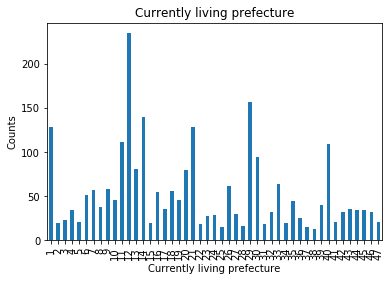

In [15]:
fig, ax = plt.subplots()
ax = df.curr_liv_pref.value_counts().sort_index().plot(kind = 'bar')
plt.title('Currently living prefecture')
ax.set_xlabel('Currently living prefecture')
ax.set_ylabel('Counts')
plt.show()

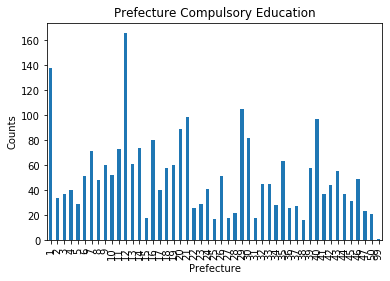

In [16]:
fig, ax = plt.subplots()
ax = df.compul_edu_pref.value_counts().sort_index().plot(kind = 'bar')
plt.title('Prefecture Compulsory Education')
ax.set_xlabel('Prefecture')
ax.set_ylabel('Counts')
plt.show()

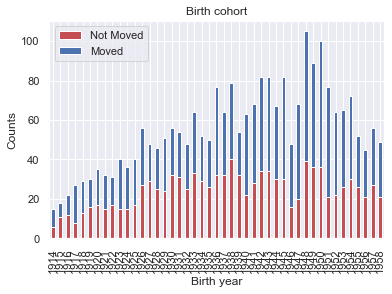

In [118]:
_df = df[['mv', 'chrt']]
_df_1 = _df[_df.mv == 1]
_df_2 = _df[_df.mv == 2]

fig, ax = plt.subplots()
ax = _df_1.chrt.value_counts().sort_index().plot(kind = 'bar', color = 'r', label = 'Not Moved')
ax = _df_2.chrt.value_counts().sort_index().plot(kind = 'bar', bottom = _df_1.chrt.value_counts().sort_index(), 
                                                    color = 'b', label ='Moved')
plt.title('Birth cohort')
ax.set_xlabel('Birth year')
ax.set_ylabel('Counts')
plt.legend()
plt.show()

In [18]:
_df = df.copy()
_df_mv_dmmy = pd.get_dummies(_df, columns = ['mv'])

In [19]:
_df_mv_dmmy['chrt']

0       1922
1       1942
2       1958
3       1951
4       1947
        ... 
2485    1936
2486    1936
2487    1936
2488    1932
2489    1934
Name: chrt, Length: 2490, dtype: int64

In [20]:
_df_mv_dmmy = _df_mv_dmmy[['mv_1', 'mv_2', 'chrt']]

In [21]:
_df_gb_chrt_mv = _df_mv_dmmy.groupby('chrt').sum().reset_index()

In [22]:
_df_gb_chrt_mv['mv_tot'] = _df_gb_chrt_mv['mv_1'] + _df_gb_chrt_mv['mv_2']

In [23]:
_df_gb_chrt_mv['mv_1'] = _df_gb_chrt_mv['mv_1']/_df_gb_chrt_mv['mv_tot']

In [24]:
_df_gb_chrt_mv['mv_2'] = _df_gb_chrt_mv['mv_2']/_df_gb_chrt_mv['mv_tot']

In [25]:
_df_1 = _df_gb_chrt_mv[['mv_1', 'chrt']].set_index('chrt')
_df_2 = _df_gb_chrt_mv[['mv_2', 'chrt']].set_index('chrt')

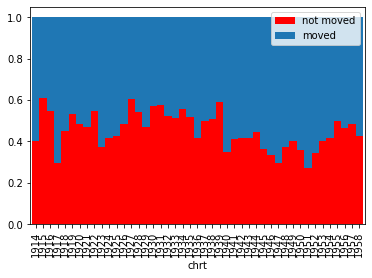

In [26]:
fig, ax = plt.subplots()
ax = _df_1.mv_1.plot(kind = 'bar', width = 1, color = 'r', label = 'not moved')
ax = _df_2.mv_2.plot(kind = 'bar', width = 1, bottom = _df_1.mv_1, label = 'moved')
plt.legend()

I don't see any patterns may need to subsample

In [27]:
df

,id,curr_liv_pref,age,mv,compul_edu_urban,compul_edu_ctype,compul_edu_pref,q3,q4_1,q4_2,...,10th_e_age,10th_chng_rsn,lifestage_1,lifestage_2,lifestage_3,lifestage_4_1,lifestage_4_2,lifestage_5,chrt,chrt_sz
0,1,10,61,1,2,8,10,3,4,63,...,,,1,2,1,1,0,98,1922,31
1,2,10,41,1,2,8,10,6,10,268,...,,,2,7,7,7,0,98,1942,82
2,3,10,25,2,2,8,3,8,3,293,...,,,2,4,1,7,0,98,1958,49
3,4,10,32,2,2,8,10,9,1,8,...,,,1,3,7,8,8,98,1951,77
4,5,10,36,2,2,8,7,7,10,270,...,,,1,3,7,4,0,98,1947,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,2486,47,47,1,2,8,47,8,1,292,...,,,1,3,7,1,0,98,1936,77
2486,2487,47,47,2,2,8,47,8,1,20,...,,,2,7,7,7,0,98,1936,77
2487,2488,47,47,2,2,8,47,6,99,999,...,,,1,3,7,1,0,98,1936,77
2488,2489,47,51,1,2,8,47,2,99,999,...,,,1,2,1,1,0,98,1932,48


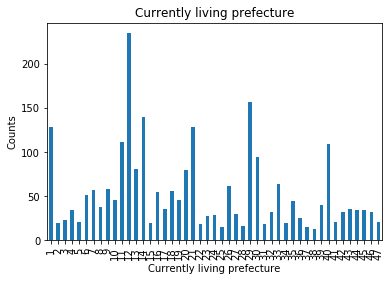

In [28]:
fig, ax = plt.subplots()
ax = df.curr_liv_pref.value_counts().sort_index().plot(kind = 'bar')
plt.title('Currently living prefecture')
ax.set_xlabel('Currently living prefecture')
ax.set_ylabel('Counts')
plt.show()

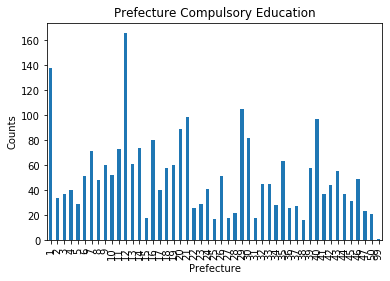

In [29]:
fig, ax = plt.subplots()
ax = df.compul_edu_pref.value_counts().sort_index().plot(kind = 'bar')
plt.title('Prefecture Compulsory Education')
ax.set_xlabel('Prefecture')
ax.set_ylabel('Counts')
plt.show()

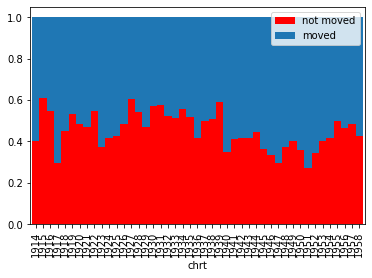

In [30]:
fig, ax = plt.subplots()
ax = _df_1.mv_1.plot(kind = 'bar', width = 1, color = 'r', label = 'not moved')
ax = _df_2.mv_2.plot(kind = 'bar', width = 1, bottom = _df_1.mv_1, label = 'moved')
plt.legend()

In [31]:
_df  = df[df.curr_liv_pref == 1]
_df

,id,curr_liv_pref,age,mv,compul_edu_urban,compul_edu_ctype,compul_edu_pref,q3,q4_1,q4_2,...,10th_e_age,10th_chng_rsn,lifestage_1,lifestage_2,lifestage_3,lifestage_4_1,lifestage_4_2,lifestage_5,chrt,chrt_sz
827,828,1,65,1,1,1,1,2,99,300,...,,,2,7,7,7,0,98,1918,29
828,829,1,42,2,2,8,1,6,4,66,...,,,1,3,7,7,0,98,1941,68
829,830,1,45,1,1,1,1,9,99,999,...,,,2,7,7,7,0,98,1938,79
830,831,1,51,1,1,1,1,3,99,999,...,,,1,1,3,7,0,39,1932,48
831,832,1,43,1,1,1,1,7,99,999,...,,,1,6,7,7,0,98,1940,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,951,1,42,2,2,8,1,7,99,300,...,,,2,7,7,4,0,98,1941,68
951,952,1,34,2,1,3,1,7,3,55,...,,,1,7,7,4,0,98,1949,89
952,953,1,40,1,2,8,1,7,1,42,...,,,1,1,3,7,0,98,1943,82
953,954,1,48,1,2,8,1,9,99,300,...,,,2,7,7,7,0,35,1935,50


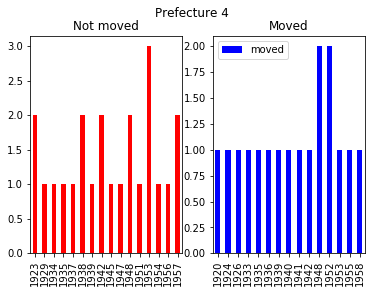

In [32]:
_df = df[df.compul_edu_pref == 4]
                                    
_df_1 = _df[_df.mv == 1]
_df_2 = _df[_df.mv == 2]

fig, axs = plt.subplots(1,2)
_df_1.chrt.value_counts().sort_index().plot(kind = 'bar', color = 'r', label = 'not moved', ax = axs[0])
_df_2.chrt.value_counts().sort_index().plot(kind = 'bar', color = 'b', label ='moved', ax = axs[1])
axs[0].title.set_text('Not moved')
axs[1].title.set_text('Moved')
fig.suptitle('Prefecture 4')
plt.legend()
plt.show()

In [62]:
_df = df[df['fin_edu_deg'] == 6] # Select Mid School Graduates after WW2
_df = _df[['init_chnl', 'chrt']]

In [57]:
df.init_chnl.unique()

array(['2', ' ', '4', '3', '1', '99', '6', '7', '5'], dtype=object)

In [63]:
# Aggregate employment chanel
chnl_agg = {
    '1': 'CONN',
    '2': 'CONN',
    '3': 'SCH',
    '4': 'SCH',
    '5': 'AD',
    '6': 'ORS',
    '7': 'SE',
    '99': 'UNK',
    ' ':'UNK',
}

In [64]:
_df['chnl_agg'] = _df['init_chnl'].map(chnl_agg)

In [66]:
_df

,init_chnl,chrt,chnl_agg
1,,1942,UNK
8,4,1935,SCH
9,3,1953,SCH
14,6,1944,ORS
15,2,1946,CONN
...,...,...,...
2472,1,1932,CONN
2475,2,1934,CONN
2484,7,1932,SE
2486,,1936,UNK


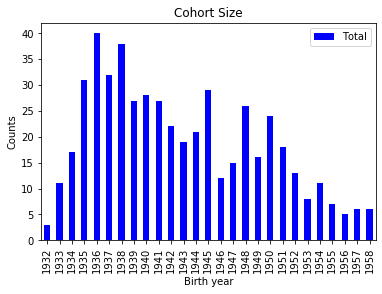

In [72]:
fig, ax = plt.subplots()
ax = _df.chrt.value_counts().sort_index().plot(kind = 'bar', color = 'b', label = 'Total')

plt.title('Cohort Size')
ax.set_xlabel('Birth year')
ax.set_ylabel('Counts')
plt.legend()
plt.show()

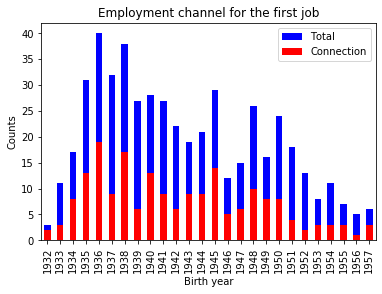

In [73]:
_df_1 = _df[_df.chnl_agg == 'CONN']
fig, ax = plt.subplots()
ax = _df.chrt.value_counts().sort_index().plot(kind = 'bar', color = 'b', label = 'Total')
ax = _df_1.chrt.value_counts().sort_index().plot(kind = 'bar', color = 'r', label = 'Connection')
#ax = _df_2.chrt.value_counts().sort_index().plot(kind = 'bar', bottom = _df_1.chrt.value_counts().sort_index(), 
#                                                    color = 'b', label ='School')

plt.title('Employment channel for the first job')
ax.set_xlabel('Birth year')
ax.set_ylabel('Counts')
plt.legend()
cplt.show()

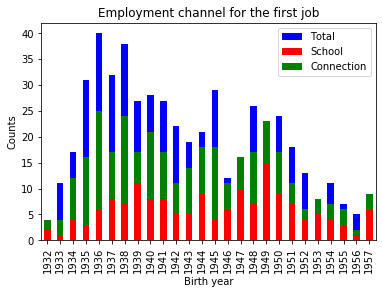

In [77]:
_df_1 = _df[_df.chnl_agg == 'SCH']
_df_2 = _df[_df.chnl_agg == 'CONN']
fig, ax = plt.subplots()
ax = _df.chrt.value_counts().sort_index().plot(kind = 'bar', color = 'b', label = 'Total')
ax = _df_1.chrt.value_counts().sort_index().plot(kind = 'bar', color = 'r', label = 'School')
ax = _df_2.chrt.value_counts().sort_index().plot(kind = 'bar', bottom = _df_1.chrt.value_counts().sort_index(), 
                                                    color = 'g', label ='Connection')

plt.title('Employment channel for the first job')
ax.set_xlabel('Birth year')
ax.set_ylabel('Counts')
plt.legend()
plt.show()

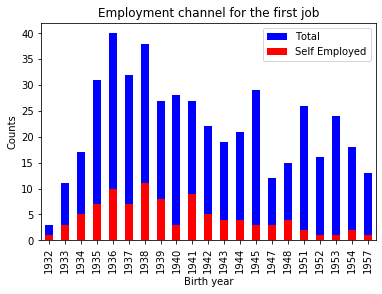

In [76]:
_df_1 = _df[_df.chnl_agg == 'SE']
fig, ax = plt.subplots()
ax = _df.chrt.value_counts().sort_index().plot(kind = 'bar', color = 'b', label = 'Total')
ax = _df_1.chrt.value_counts().sort_index().plot(kind = 'bar', color = 'r', label = 'Self Employed')

plt.title('Employment channel for the first job')
ax.set_xlabel('Birth year')
ax.set_ylabel('Counts')
plt.legend()
plt.show()

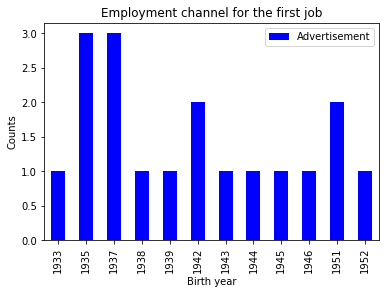

In [70]:
_df_1 = _df[_df.chnl_agg == 'AD']
fig, ax = plt.subplots()
ax = _df_1.chrt.value_counts().sort_index().plot(kind = 'bar', color = 'b', label = 'Advertisement')

plt.title('Employment channel for the first job')
ax.set_xlabel('Birth year')
ax.set_ylabel('Counts')
plt.legend()
plt.show()

In [101]:
_df = df[df['fin_edu_deg'] == 6] # Select Mid School Graduates after WW2
_df = _df[['init_chnl', 'chrt']]

In [133]:
# Aggregate employment chanel
chnl_agg = {
    '1': 'CONN',
    '2': 'CONN',
    '3': 'SCH',
    '4': 'PES',
    '5': 'AD',
    '6': 'ORS',
    '7': 'SE',
    '99': 'UNK',
    ' ':'UNK',
}

In [103]:
_df['chnl_agg'] = _df['init_chnl'].map(chnl_agg)

In [104]:
_df = _df[['chrt', 'chnl_agg']]

In [105]:
_df['total'] = 1 # use ones to create total

In [106]:
_df_ch_dmmy = pd.get_dummies(_df, columns = ['chnl_agg'])

In [107]:
_df_ch_dmmy.columns

Index(['chrt', 'total', 'chnl_agg_AD', 'chnl_agg_CONN', 'chnl_agg_ORS',
       'chnl_agg_SCH', 'chnl_agg_SE', 'chnl_agg_UNK'],
      dtype='object')

In [108]:
_df_gb_chrt_ch = _df_ch_dmmy.groupby('chrt').sum().reset_index()

In [109]:
_df_gb_chrt_ch['class'] = _df_gb_chrt_ch['chrt'] + 15

In [110]:
_df_gb_chrt_ch.set_index('class')

,chrt,total,chnl_agg_AD,chnl_agg_CONN,chnl_agg_ORS,chnl_agg_SCH,chnl_agg_SE,chnl_agg_UNK
class,,,,,,,,
1947,1932,3,0,2,0,0,1,0
1948,1933,11,1,3,1,2,3,1
1949,1934,17,0,8,3,1,5,0
1950,1935,31,3,13,2,4,7,2
1951,1936,40,0,19,1,3,10,7
1952,1937,32,3,9,0,6,7,7
1953,1938,38,1,17,0,8,11,1
1954,1939,27,1,6,2,7,8,3
1955,1940,28,0,13,1,11,3,0


In [112]:
import seaborn as sns
sns.set()

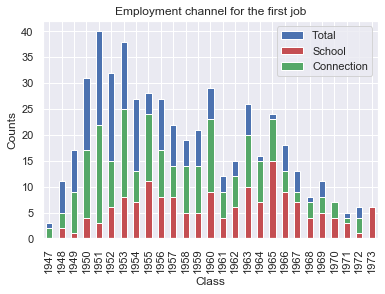

In [113]:
_df = _df_gb_chrt_ch.set_index('class')
fig, ax = plt.subplots()
ax = _df.total.plot(kind = 'bar', color = 'b', label = 'Total')
ax = _df.chnl_agg_SCH.plot(kind = 'bar', color = 'r', label = 'School')
ax = _df.chnl_agg_CONN.plot(kind = 'bar', bottom = _df.chnl_agg_SCH, 
                                                   color = 'g', label ='Connection')

plt.title('Employment channel for the first job')
ax.set_xlabel('Class')
ax.set_ylabel('Counts')
plt.legend()
plt.show()

In [114]:
_df_gb_chrt_ch.to_csv('female.csv')

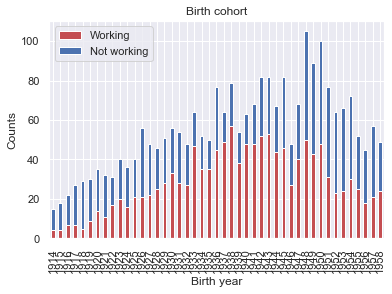

In [116]:
_df = df[['curr_job', 'chrt']]
_df_1 = _df[_df.curr_job == 1]
_df_2 = _df[_df.curr_job == 2]

fig, ax = plt.subplots()
ax = _df_1.chrt.value_counts().sort_index().plot(kind = 'bar', color = 'r', label = 'Working')
ax = _df_2.chrt.value_counts().sort_index().plot(kind = 'bar', bottom = _df_1.chrt.value_counts().sort_index(), 
                                                    color = 'b', label ='Not working')
plt.title('Birth cohort')
ax.set_xlabel('Birth year')
ax.set_ylabel('Counts')
plt.legend()
plt.show()

In [121]:
_df = df.copy()
_df_jb_dmmy = pd.get_dummies(_df, columns = ['curr_job'])

In [122]:
_df_jb_dmmy['total'] = 1

In [123]:
_df_jb_dmmy = _df_jb_dmmy[['curr_job_1', 'curr_job_2', 'chrt', 'total']]

In [125]:
_df_jb = _df_jb_dmmy.groupby('chrt').sum().reset_index()

In [126]:
_df_jb['curr_job_1_shr'] = _df_jb['curr_job_1']/_df_jb['total']

In [127]:
_df_jb['curr_job_2_shr'] = _df_jb['curr_job_2']/_df_jb['total']

In [128]:
_df_1 = _df_jb[['curr_job_1_shr', 'chrt']].set_index('chrt')
_df_2 = _df_jb[['curr_job_2_shr', 'chrt']].set_index('chrt')

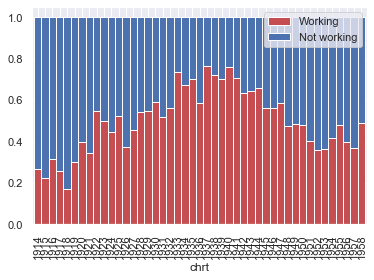

In [132]:
fig, ax = plt.subplots()
ax = _df_1.curr_job_1_shr.plot(kind = 'bar', width = 1, color = 'r', label = 'Working')
ax = _df_2.curr_job_2_shr.plot(kind = 'bar', width = 1, bottom = _df_1.curr_job_1_shr, label = 'Not working')
plt.legend()